<center><h1>Wang_Timothy_HW2</h1></center>
<br>
<br>

Name: Timothy Wang
<br>
Github Username: timothyswang
<br>
USC ID: 2697040790

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels
import statsmodels.api as stat
import sklearn
import sklearn.linear_model
import sklearn.neighbors
from sklearn.preprocessing import PolynomialFeatures

Get the Cycle Power Plant Data Set

In [2]:
#Get Data
#[1]
power_data = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx")

print(power_data)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


### (b) Exploring the data

#### i. rows and columns

According to Pandas (see output above), there are 9568 rows in the data, and 5 columns.

The first four columns represents a different measured variable of the power plant. These are our features.
- "AT" is for temperature
- "AP" is for ambient pressure
- "RH" is for relative humidity
- "V" is for exhaust vacuum

The last column "PE" is for electrical energy output. This is our "label" or dependent variable for each datapoint, and we are assuming that AT, AP, RH, and V can help us predict PE.

Each row represents a datapoint. Each datapoint represents an hour, with the AT, AP, RH, and V values for each datapoint being the hourly average measure of that particular variable for that hour. The PE value for a datapoint represents the net hourly electrical energy output for that particular hour.

#### ii. pairwise scatterplots of all the varianbles

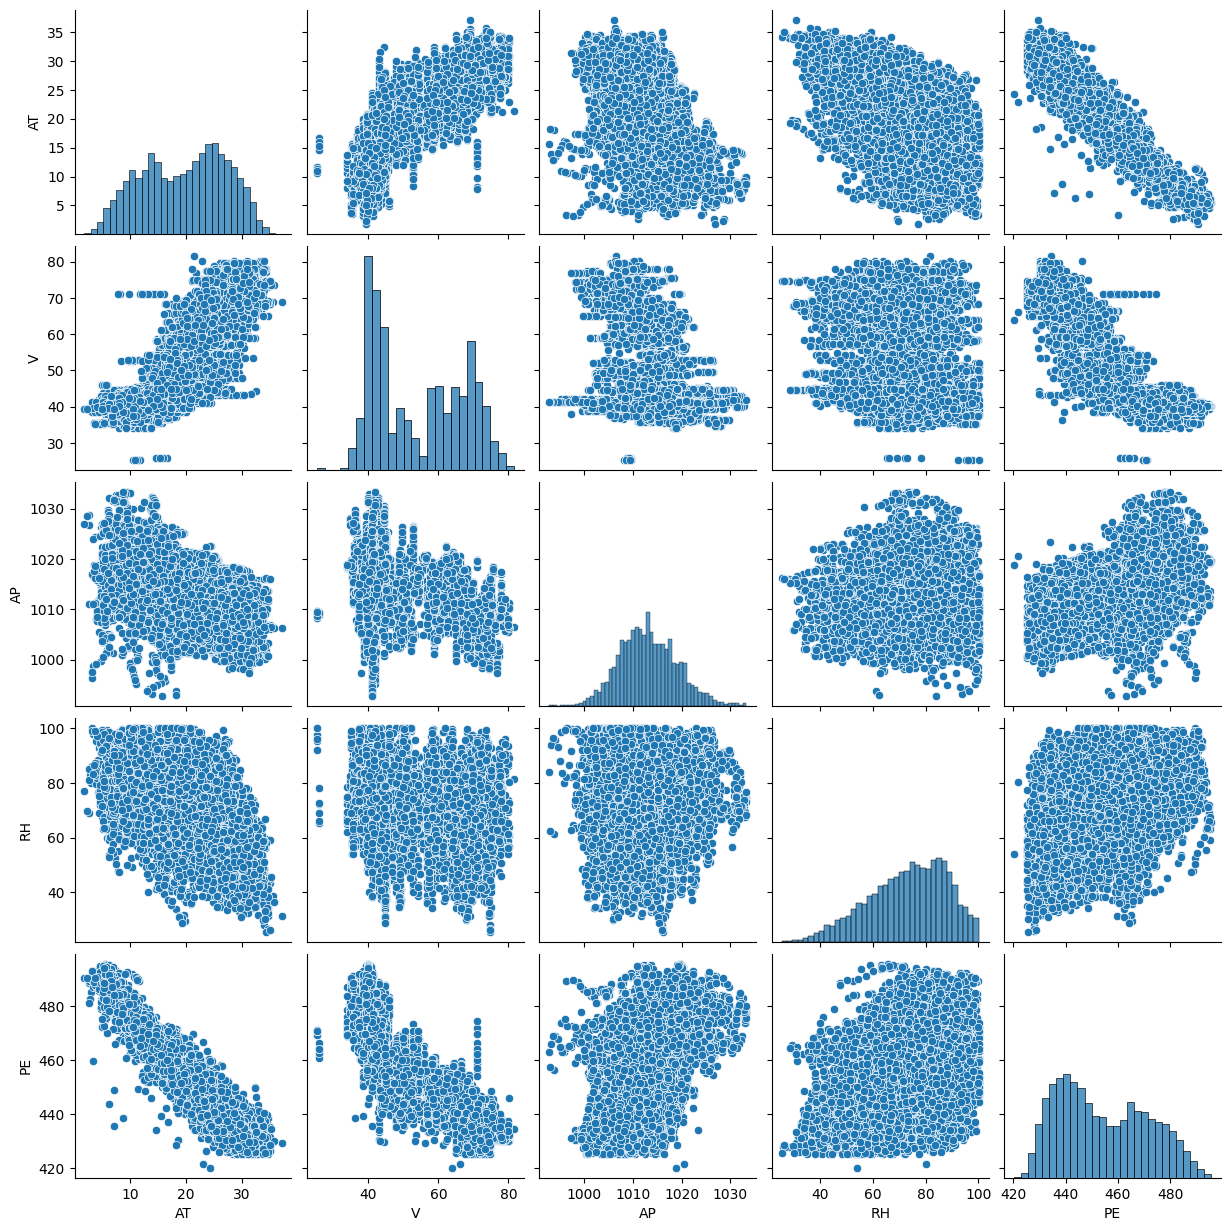

In [3]:
#[2]

seaborn.pairplot(power_data)

Looking at the above scatterplots, there are a few pairs of variables that appear to show some sort of correlation.

1. There appears to be a slight correlation between AT (temperature) and PE (energy output). The higher the AT is, the lower the PE tends to be.

2. Another slight correlation is between V (exhaust vacuum) and PE (energy output). Again, the higher V is, the lower PE tends to be.

3. Finally, there tends to be a slight correlation between AT (temperature) and V (exhaust vacuum). So the higher T is, the higher V tends to be.

Of course, there are outliers to these correlations, and the correlations themselves do not appear to be extremely strict (especially for correlations 2 and 3).

The other pairs of variables do not appear to have any strong correlations (the datapoints are scattered in a large blob). Of course, this is an assessment only made via visual inspection, and so is probably not a robust conclusion.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


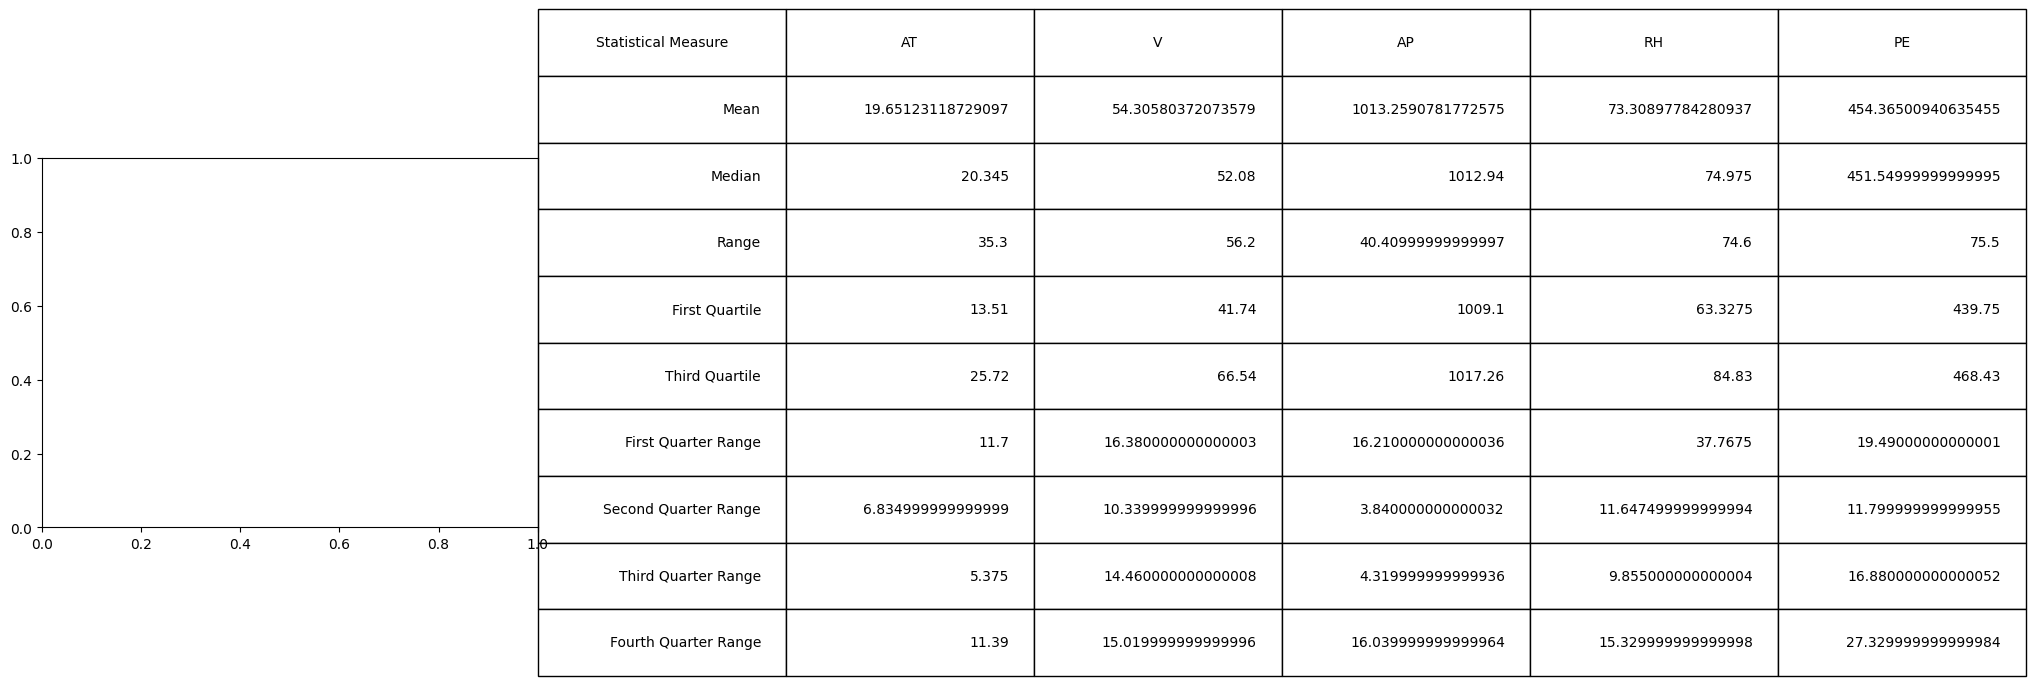

In [4]:
power_data_desc = power_data.describe()

print(power_data_desc)

#mean
mean_array = np.array(power_data_desc.iloc[1])
power_data_mean = np.append(["Mean"], mean_array)

#median
median_array = np.array(power_data_desc.iloc[5])
power_data_median = np.append(["Median"], median_array)

#range
range_array = np.array(power_data_desc.iloc[7] - power_data_desc.iloc[3])
power_data_range = np.append(["Range"], range_array)

#first quartile
fq_array = np.array(power_data_desc.iloc[4])
power_data_fq = np.append(["First Quartile"], fq_array)

#third quartile
tq_array = np.array(power_data_desc.iloc[6])
power_data_tq = np.append(["Third Quartile"], tq_array)

#first quarter range
firstqrange_array = np.array(power_data_desc.iloc[4] - power_data_desc.iloc[3])
power_data_firstqrange = np.append(["First Quarter Range"], firstqrange_array)

#second quarter range
secondqrange_array = np.array(power_data_desc.iloc[5] - power_data_desc.iloc[4])
power_data_secondqrange = np.append(["Second Quarter Range"], secondqrange_array)

#third quarter range
thirdqrange_array = np.array(power_data_desc.iloc[6] - power_data_desc.iloc[5])
power_data_thirdqrange = np.append(["Third Quarter Range"], thirdqrange_array)

#fourth quarter range
fourthqrange_array = np.array(power_data_desc.iloc[7] - power_data_desc.iloc[6])
power_data_fourthqrange = np.append(["Fourth Quarter Range"], fourthqrange_array)

power_data_all_stats = [power_data_mean, power_data_median, power_data_range, power_data_fq, power_data_tq, power_data_firstqrange, power_data_secondqrange, power_data_thirdqrange, power_data_fourthqrange]

#[3]
this_table = plt.table(cellText=power_data_all_stats, loc="right", colLabels=["Statistical Measure", "AT", "V", "AP", "RH", "PE"])
#[4]
this_table.scale(3,4)
plt.show()

### (c) Simple Linear Regression

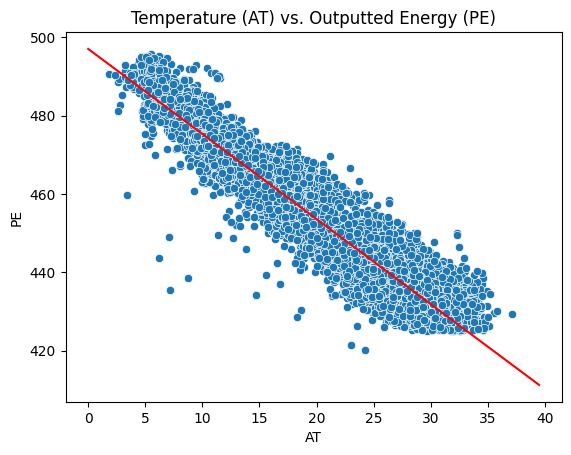

Estimated Coefficient -2.1713199585178105
Estimated Intercept 497.0341198927662
P-Value for Coefficient 0.0
P-Value for Intercept 0.0
--------------------------------------


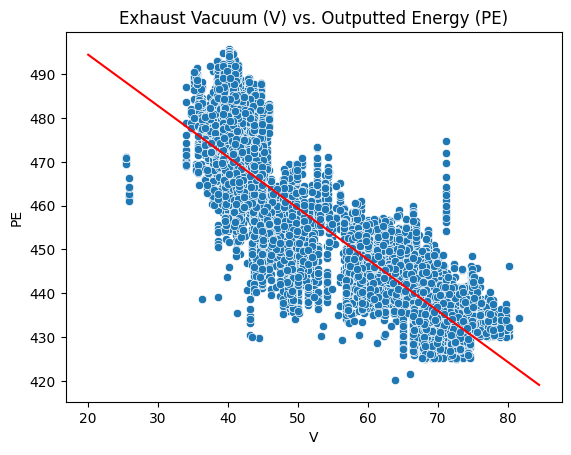

Estimated Coefficient -1.168135126555741
Estimated Intercept 517.8015263083873
P-Value for Coefficient 0.0
P-Value for Intercept 0.0
--------------------------------------


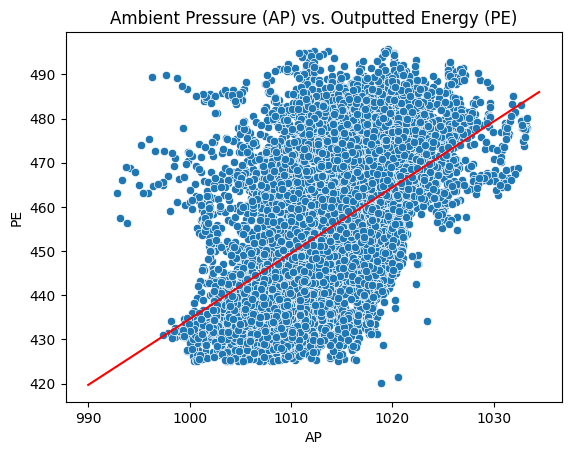

Estimated Coefficient 1.489871673399113
Estimated Intercept -1055.2609889844387
P-Value for Coefficient 0.0
P-Value for Intercept 0.0
--------------------------------------


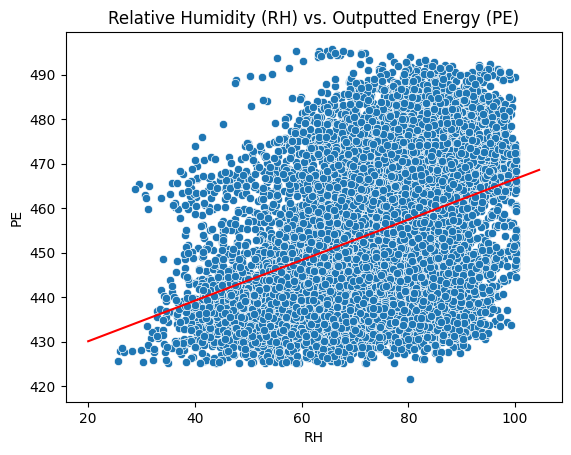

Estimated Coefficient 0.45565010226298014
Estimated Intercept 420.9617661554837
P-Value for Coefficient 0.0
P-Value for Intercept 0.0
--------------------------------------


In [5]:
#[5]
power_data_reg = power_data.assign(intercept=1.0)

AT = power_data_reg[["AT", "intercept"]]
V = power_data_reg[["V", "intercept"]]
AP = power_data_reg[["AP", "intercept"]]
RH = power_data_reg[["RH", "intercept"]]
PE = power_data_reg["PE"]

# AT2 = np.array(power_data["AT"]).reshape(-1, 1)
# V = np.array(power_data["V"]).reshape(-1, 1)
# AP = np.array(power_data["AP"]).reshape(-1, 1)
# RH = np.array(power_data["RH"]).reshape(-1, 1)
# PE2 = np.array(power_data["PE"]).reshape(-1, 1)

#[6]
slr_at = stat.OLS(PE, AT).fit()
slr_v = stat.OLS(PE, V).fit()
slr_ap = stat.OLS(PE, AP).fit()
slr_rh = stat.OLS(PE, RH).fit()

# slr_at = sklearn.linear_model.LinearRegression().fit(AT2, PE2)
# print(slr_at.coef_, slr_at.intercept_)
# slr_v = sklearn.linear_model.LinearRegression().fit(V, PE)
# slr_ap = sklearn.linear_model.LinearRegression().fit(AP, PE)
# slr_rh = sklearn.linear_model.LinearRegression().fit(RH, PE)

# AT vs PE
#[7]
slr_at_coef = slr_at.params.AT
slr_at_int = slr_at.params.intercept
#[8]
seaborn.scatterplot(data=power_data[["AT", "PE"]], x="AT", y="PE")
#[9]
slr_at_x = np.arange(0.0, 40.0, 0.5)
slr_at_y = slr_at_coef * slr_at_x + slr_at_int
plt.plot(slr_at_x, slr_at_y, "r")
plt.title("Temperature (AT) vs. Outputted Energy (PE)")
plt.show()
print("Estimated Coefficient", slr_at_coef)
print("Estimated Intercept", slr_at_int)
print("P-Value for Coefficient", slr_at.pvalues.AT)
print("P-Value for Intercept", slr_at.pvalues.intercept)
print("--------------------------------------")

# V vs PE
slr_v_coef = slr_v.params.V
slr_v_int = slr_v.params.intercept
#[8]
seaborn.scatterplot(data=power_data[["V", "PE"]], x="V", y="PE")
#[9]
slr_v_x = np.arange(20.0, 85.0, 0.5)
slr_v_y = slr_v_coef * slr_v_x + slr_v_int
plt.plot(slr_v_x, slr_v_y, "r")
plt.title("Exhaust Vacuum (V) vs. Outputted Energy (PE)")
plt.show()
print("Estimated Coefficient", slr_v_coef)
print("Estimated Intercept", slr_v_int)
print("P-Value for Coefficient", slr_v.pvalues.V)
print("P-Value for Intercept", slr_v.pvalues.intercept)
print("--------------------------------------")

# AP vs PE
slr_ap_coef = slr_ap.params.AP
slr_ap_int = slr_ap.params.intercept
#[8]
seaborn.scatterplot(data=power_data[["AP", "PE"]], x="AP", y="PE")
#[9]
slr_ap_x = np.arange(990.0, 1035.0, 0.5)
slr_ap_y = slr_ap_coef * slr_ap_x + slr_ap_int
plt.plot(slr_ap_x, slr_ap_y, "r")
plt.title("Ambient Pressure (AP) vs. Outputted Energy (PE)")
plt.show()
print("Estimated Coefficient", slr_ap_coef)
print("Estimated Intercept", slr_ap_int)
print("P-Value for Coefficient", slr_ap.pvalues.AP)
print("P-Value for Intercept", slr_ap.pvalues.intercept)
print("--------------------------------------")

# RH vs PE
slr_rh_coef = slr_rh.params.RH
slr_rh_int = slr_rh.params.intercept
#[8]
seaborn.scatterplot(data=power_data[["RH", "PE"]], x="RH", y="PE")
#[9]
slr_rh_x = np.arange(20.0, 105.0, 0.5)
slr_rh_y = slr_rh_coef * slr_rh_x + slr_rh_int
plt.plot(slr_rh_x, slr_rh_y, "r")
plt.title("Relative Humidity (RH) vs. Outputted Energy (PE)")
plt.show()
print("Estimated Coefficient", slr_rh_coef)
print("Estimated Intercept", slr_rh_int)
print("P-Value for Coefficient", slr_rh.pvalues.RH)
print("P-Value for Intercept", slr_rh.pvalues.intercept)
print("--------------------------------------")


I fitted a simple linear regression model to each predictor. Above are the estimated coefficients, estimated intercepts, and the p-values for the coefficients and intercept. In addition, I made scatterplots (predictor vs. outputted energy) that includes a linear regression line based on the estimated coefficients and intercepts.

Looking at the estimates, in general, it appears as though a higher temperature and exhaust vacuum generally means a lower outputted energy (negative value for the coefficients). In general, it appears as though a higher ambient pressure and relative humidity generally means a higher outputted energy (positive value for the coefficients). Looking at the absolute values of the coefficients, the temperature coefficient had the largest absolute value, meaning a change in temperature had the largest impact on energy outputted. Relative humidity had the smallest coefficient, meaning a change in relative humidity had the smallest impact on energy outputted. That being said, the datapoints (especially for ambient pressure and relative humidity) don't appear stay close to the regression line. (It sometimes looks a bit like a huge blob of datapoints.)

Using p-value analysis, the p-values obtained for all of the coefficients and all the intercepts were reported by the statsmodel library to be extremely close to 0.0. This means that it's very likely that the coefficients and intercepts found using these models are statistically significant for all of our models.

In [6]:
#Outliers

#AT
#[10]
slr_at_outliers = slr_at.get_influence()
slr_at_cooks_dist = slr_at_outliers.cooks_distance[0]
for i in range(len(slr_at_cooks_dist)):
    #[10]
    if slr_at_cooks_dist[i] > 1:
        print("AT:", i)

#V
#[10]
slr_v_outliers = slr_v.get_influence()
slr_v_cooks_dist = slr_v_outliers.cooks_distance[0]
for i in range(len(slr_v_cooks_dist)):
    #[10]
    if slr_v_cooks_dist[i] > 1:
        print("V:", i)

#AP
#[10]
slr_ap_outliers = slr_ap.get_influence()
slr_ap_cooks_dist = slr_ap_outliers.cooks_distance[0]
for i in range(len(slr_ap_cooks_dist)):
    #[10]
    if slr_ap_cooks_dist[i] > 1:
        print("AP:", i)

#RH
#[10]
slr_rh_outliers = slr_rh.get_influence()
slr_rh_cooks_dist = slr_rh_outliers.cooks_distance[0]
for i in range(len(slr_rh_cooks_dist)):
    #[10]
    if slr_rh_cooks_dist[i] > 1:
        print("RH:", i)

I used Cook's Distance to see if there were any points that had an undue impact/influence on the rest of the data [10]. These would be potential outliers that I would consider removing from the data. If there were any points that had a Cook's Distance greater than 1, those points should be printed out via the code above.

However, it appears as though the Cook's Distances for all of the points that I looked at were extremely small, with none having a distance above 1. This is probably because of the sheer amount of datapoints in the dataset. Because of this, I would say there are no datapoints that I would want to discard because they are outliers, for any of the regression tasks.

### (d) Multiple Regression

In [7]:
all_predictors = power_data_reg[["AT", "V", "AP", "RH", "intercept"]]

# slr_at = stat.OLS(PE, AT).fit()
# slr_at = stat.OLS(PE, AT).fit()
# slr_v = stat.OLS(PE, V).fit()
# slr_ap = stat.OLS(PE, AP).fit()
# slr_rh = stat.OLS(PE, RH).fit()
#[6]
mr_results = stat.OLS(PE, all_predictors).fit() 
print(mr_results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:52:47   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9775      0.015   -129.342      0.0

When taking into account all of the predictors, I found that all of the predictors had a p-value that was extremely close to zero. This means that it's very likely that all of the predictors are statistically relevant. This means that it's probably safe to reject the null hypothesis (the predictor's coefficient = 0) for all of our predictors.

Looking at the estimated coefficients individually, it appears as though temperature (AT), exhaust vacuum (V), and relative humidity (RH) have a negative value for their coefficients. This means that as these values increased, the amount of energy produced (PE) generally tends to decrease. Meanwhile, ambient pressure (AP) has a positive coefficient, which means as ambient pressure increases, the amount of energy outputted (PE) generally tends to increase.

Looking at the absolute value of the coefficients, temperature had the highest absolute value, meaning a change in temperature has the biggest impact on the amount of energy outputted. Ambient pressure had the lowest absolute value, meaning a change in ambient pressure has the smallest impact on the amount of energy outputted. (All of this is an estimation according to the model, of course.)

### (e) 1c Compare to 1d

           Predictor_Name  1c_Coefficients  1d_Coefficients
0        Temperature (AT)        -2.171320        -1.977513
1      Exhaust Vacuum (V)        -1.168135        -0.233916
2   Ambient Pressure (AP)         1.489872         0.062083
3  Relative Humidity (RH)         0.455650        -0.158054


Text(0.5, 1.0, 'Coefficient Comparisons')

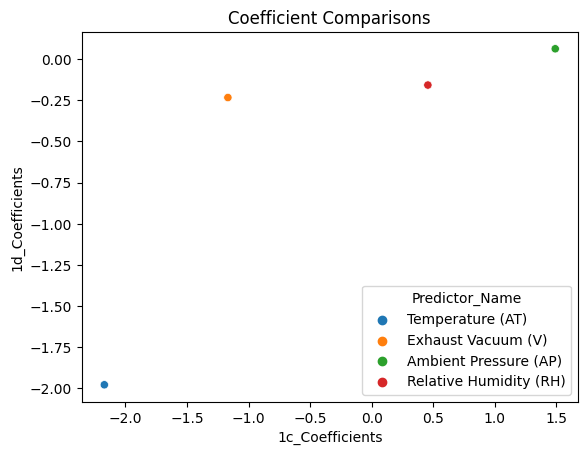

In [8]:
at_coefs = ["Temperature (AT)", slr_at_coef, mr_results.params.AT]
v_coefs = ["Exhaust Vacuum (V)", slr_v_coef, mr_results.params.V]
ap_coefs = ["Ambient Pressure (AP)", slr_ap_coef, mr_results.params.AP]
rh_coefs = ["Relative Humidity (RH)", slr_rh_coef, mr_results.params.RH]

c_d_comparison = pd.DataFrame(data=[at_coefs, v_coefs, ap_coefs, rh_coefs], columns=["Predictor_Name", "1c_Coefficients", "1d_Coefficients"])

print(c_d_comparison)

#[11]
seaborn.scatterplot(data=c_d_comparison, x="1c_Coefficients", y="1d_Coefficients", hue="Predictor_Name")
plt.title("Coefficient Comparisons")

Looking at the results, it appears that the absolute values for the coefficients from 1c are generally larger than the absolute values for the coefficients from 1d. In addition, while there are two negative and two positive coefficients for 1c, there are three negative and only one positive coefficients for 1d.

### (f) Nonlinear Association

In [9]:
#AT
# print(power_data["AT"])
#[12]
at_poly_feat = PolynomialFeatures(3)
at_poly = at_poly_feat.fit_transform(power_data[["AT"]])

at_poly_df = pd.DataFrame(data=at_poly, columns=["AT^0", "AT^1", "AT^2", "AT^3"])

# print(at_poly_df)
#[6]
slr_at_poly = stat.OLS(PE, at_poly_df).fit()
print(slr_at_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:52:47   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT^0         492.7281      0.673    732.248      0.0

In [10]:
#V
# print(power_data["V"])
#[12]
v_poly_feat = PolynomialFeatures(3)
v_poly = v_poly_feat.fit_transform(power_data[["V"]])

v_poly_df = pd.DataFrame(data=v_poly, columns=["V^0", "V^1", "V^2", "V^3"])

# print(v_poly_df)

#[6]
slr_v_poly = stat.OLS(PE, v_poly_df).fit()
print(slr_v_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:52:47   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V^0          554.1468      9.151     60.557      0.0

In [11]:
#AP
# print(power_data["AP"])
#[12]
ap_poly_feat = PolynomialFeatures(3)
ap_poly = ap_poly_feat.fit_transform(power_data[["AP"]])

ap_poly_df = pd.DataFrame(data=ap_poly, columns=["AP^0", "AP^1", "AP^2", "AP^3"])

# print(ap_poly_df)

#[6]
slr_ap_poly = stat.OLS(PE, ap_poly_df).fit()
print(slr_ap_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:52:47   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AP^0           0.0747      0.009      8.415      0.0

In [12]:
#RH
# print(power_data["RH"])
#[12]
rh_poly_feat = PolynomialFeatures(3)
rh_poly = rh_poly_feat.fit_transform(power_data[["RH"]])

rh_poly_df = pd.DataFrame(data=rh_poly, columns=["RH^0", "RH^1", "RH^2", "RH^3"])

# print(rh_poly_df)

#[6]
slr_rh_poly = stat.OLS(PE, rh_poly_df).fit()
print(slr_rh_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:52:47   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RH^0         468.4135     10.545     44.422      0.0

Nonlinear Associations:

_Temperature (AT)_: There is evidence for a nonlinear relationship between energy outputted (PE) and temperature. The p-value for the AT^2 and AT^3 terms in the model was very close to 0.0. This strongly suggests that there is an association between AT^2 and AT^3 and the energy outputted (PE).

_Exhaust Vacuum (V)_: There is some evidence for a nonlinear relationship between energy outputted (PE) and temperature. The p-value for V^3 was 0.014, which is less than 0.05. If you use 0.05 as the boundary for the association being statistically significant, then there is evidence that there is an association between V^3 and outputted energy (PE). However, the p-value for V^2 was 0.768. This is way above our 0.05 boundary. Thus, I would argue that V^2 does NOT have statistically significant relation to outputted energy (PE).

_Ambient Pressure (AP)_: There is evidence for a nonlinear relationship between energy outputted (PE) and ambient pressure. The p-value for the AP^2 and AP^3 terms in the model was very close to 0.0. This strongly suggests that there is an association between AP^2 and AP^3 and the energy outputted (PE).

_Relative Humidity (RH)_: There is evidence for a nonlinear relationship between energy outputted (PE) and relative humidity. The p-value for the RH^2 and RH^3 terms in the model was very close to 0.0. This strongly suggests that there is a relationship between RH^2 and RH^3 and the energy outputted (PE).

### (g) Interactions of Predictors

In [13]:
#All Possible Interactions:
# ATxV, ATxAP, ATxRH, VxAP, VxRH, APxRH

ATxV = power_data["AT"] * power_data["V"]
ATxAP = power_data["AT"] * power_data["AP"]
ATxRH = power_data["AT"] * power_data["RH"]
VxAP = power_data["V"] * power_data["AP"]
VxRH = power_data["V"] * power_data["RH"]
APxRH = power_data["AP"] * power_data["RH"]

#[13]
all_interactions = pd.concat({"ATxV": ATxV, "ATxAP": ATxAP, "ATxRH": ATxRH, "VxAP": VxAP, "VxRH": VxRH, "APxRH": APxRH}, axis=1)
all_interactions = all_interactions.assign(intercept=1.0)

#[6]
mr_all_interactions = stat.OLS(PE, all_interactions).fit()
print(mr_all_interactions.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 2.236e+04
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:52:47   Log-Likelihood:                -27757.
No. Observations:                9568   AIC:                         5.553e+04
Df Residuals:                    9561   BIC:                         5.558e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ATxV           0.0105      0.001     15.063      0.0

I ran a full linear regression model with all possible pairs of predictors. This allowed me to create a model with all pairwise interaction terms.

Looking at the fitted model, it appears that the p-values for every interaction term except ATxRH was very close to zero. ATxRH had a p-value of 0.001. All of these p-values, however, are very small (less than 0.05). This means that it's very likely that all of these interaction terms have a statistically significant relationship with outputted energy (PE).

### (h) Improvement

In [14]:
#Test dataframe

#[14]
train_df = power_data_reg.sample(frac=0.7, random_state=101)
#[15]
test_df = power_data_reg[ ~power_data.index.isin(train_df.index)]

#Regular model with all predictors
all_predictors_train_input = train_df[["AT", "V", "AP", "RH", "intercept"]]
all_predictors_train_output = train_df["PE"]

all_predictors_test_input = test_df[["AT", "V", "AP", "RH", "intercept"]]
all_predictors_test_output = test_df["PE"]

#[6]
all_predictors_model = stat.OLS(all_predictors_train_output, all_predictors_train_input).fit()

all_predictors_train_pred = all_predictors_model.predict(all_predictors_train_input) #[16]
all_predictors_train_mse = stat.tools.eval_measures.mse(all_predictors_train_pred, all_predictors_train_output) #[17]

all_predictors_test_pred = all_predictors_model.predict(all_predictors_test_input) #[16]
all_predictors_test_mse = stat.tools.eval_measures.mse(all_predictors_test_pred, all_predictors_test_output) #[17]

# ---------------------------------------------------------

#All interaction terms and quadratic nonlinearities, insignificant variables included
# ATxV = power_data["AT"] * power_data["V"]

ATxAT = power_data["AT"] * power_data["AT"]
VxV = power_data["V"] * power_data["V"]
APxAP = power_data["AP"] * power_data["AP"]
RHxRH = power_data["RH"] * power_data["RH"]

non_pvalue = pd.concat({"ATxV": ATxV, "ATxAP": ATxAP, "ATxRH": ATxRH, "VxAP": VxAP, "VxRH": VxRH, "APxRH": APxRH, "ATxAT": ATxAT, "VxV": VxV, "APxAP": APxAP, "RHxRH": RHxRH}, axis=1)
non_pvalue = non_pvalue.assign(intercept=1.0)
#[14]
non_pvalue_train_input = non_pvalue.sample(frac=0.7, random_state=101)
non_pvalue_train_output = train_df["PE"]
#[15]
non_pvalue_test_input = non_pvalue[ ~power_data.index.isin(train_df.index)]
non_pvalue_test_output = test_df["PE"]

#[6]
non_pvalue_model = stat.OLS(non_pvalue_train_output, non_pvalue_train_input).fit()

non_pvalue_train_pred = non_pvalue_model.predict(non_pvalue_train_input) #[16]
non_pvalue_train_mse = stat.tools.eval_measures.mse(non_pvalue_train_pred, non_pvalue_train_output) #[17]

non_pvalue_test_pred = non_pvalue_model.predict(non_pvalue_test_input) #[16]
non_pvalue_test_mse = stat.tools.eval_measures.mse(non_pvalue_test_pred, non_pvalue_test_output) #[17]

print(non_pvalue_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     9791.
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:52:48   Log-Likelihood:                -19281.
No. Observations:                6698   AIC:                         3.858e+04
Df Residuals:                    6687   BIC:                         3.866e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ATxV           0.0114      0.003      3.918      0.0

Looking at the above p-values, it appears that the only term that is not statistically significant is VxRH (the only one with a p value greater than 0.05.) I'm going to remove that term from the model below.

In [15]:
with_pvalue = pd.concat({"ATxV": ATxV, "ATxAP": ATxAP, "ATxRH": ATxRH, "VxAP": VxAP, "APxRH": APxRH, "ATxAT": ATxAT, "VxV": VxV, "APxAP": APxAP, "RHxRH": RHxRH}, axis=1)
with_pvalue = with_pvalue.assign(intercept=1.0)
#[14]
with_pvalue_train_input = with_pvalue.sample(frac=0.7, random_state=101)
with_pvalue_train_output = train_df["PE"]
#[15]
with_pvalue_test_input = with_pvalue[ ~power_data.index.isin(train_df.index)]
with_pvalue_test_output = test_df["PE"]

#[6]
with_pvalue_model = stat.OLS(with_pvalue_train_output, with_pvalue_train_input).fit()

with_pvalue_train_pred = with_pvalue_model.predict(with_pvalue_train_input) #[16]
with_pvalue_train_mse = stat.tools.eval_measures.mse(with_pvalue_train_pred, with_pvalue_train_output) #[17]

with_pvalue_test_pred = with_pvalue_model.predict(with_pvalue_test_input) #[16]
with_pvalue_test_mse = stat.tools.eval_measures.mse(with_pvalue_test_pred, with_pvalue_test_output) #[17]

print("All Predictors Train MSE:", all_predictors_train_mse)
print("All Predictors Test MSE:", all_predictors_test_mse)
print("--------")
print("Nonlinear Terms Train MSE:", non_pvalue_train_mse)
print("Nonlinear Terms Test MSE:", non_pvalue_test_mse)
print("--------")
print("Nonlinear Terms Taking into Account P-Values Train MSE:", with_pvalue_train_mse)
print("Nonlinear Terms Taking into Account P-Values Test MSE:", with_pvalue_test_mse)

All Predictors Train MSE: 20.45736463626562
All Predictors Test MSE: 21.50752005117152
--------
Nonlinear Terms Train MSE: 18.52697014324864
Nonlinear Terms Test MSE: 19.07332712919617
--------
Nonlinear Terms Taking into Account P-Values Train MSE: 18.526976774020458
Nonlinear Terms Taking into Account P-Values Test MSE: 19.07238086134974


MSE for model with all predictors:

Training MSE: 20.457

Testing MSE: 21.508

MSE for model with nonlinear terms (interaction terms and quadratic nonlinearities), without taking into account p-values:

Training MSE: 18.527

Testing MSE: 19.073

MSE for model with nonlinear terms (interaction terms and quadratic nonlinearities), removing terms that are not statistically significant via looking at their p-values:

Training MSE: 18.527

Testing MSE: 19.072

### (i) KNN

(Raw) The minimum test MSE is: 17.11536027317072
(Raw) The k value that had the minimum test MSE (and best fit) is: 4


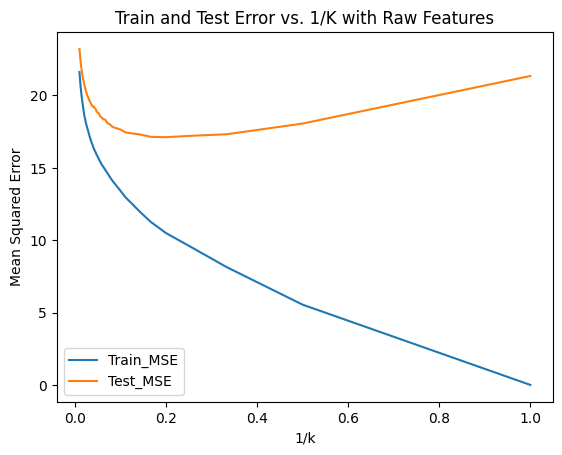

In [16]:
k_values = []
for i in range(100):
    input_number = float(i+1)
    k_values.append(input_number)

raw_MSE_data = []
raw_testing_MSE = []

#Raw features
for raw_k_value in k_values:
    #[18]
    raw_knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=int(raw_k_value))
    raw_knn.fit(X=all_predictors_train_input, y=all_predictors_train_output)

    raw_train_predicted_y = raw_knn.predict(X=all_predictors_train_input)
    raw_test_predicted_y = raw_knn.predict(X=all_predictors_test_input)

    this_raw_train_MSE = stat.tools.eval_measures.mse(raw_train_predicted_y, all_predictors_train_output) #[17]
    this_raw_test_MSE = stat.tools.eval_measures.mse(raw_test_predicted_y, all_predictors_test_output) #[17]

    plotted_raw_k_value = 1.0 / raw_k_value

    raw_MSE_data.append([plotted_raw_k_value, this_raw_train_MSE, this_raw_test_MSE])

    raw_testing_MSE.append(this_raw_test_MSE)

raw_minimum_MSE = np.min(raw_testing_MSE)
raw_minimum_MSE_k = np.argmin(raw_testing_MSE)

print("(Raw) The minimum test MSE is:", raw_minimum_MSE)
print("(Raw) The k value that had the minimum test MSE (and best fit) is:", raw_minimum_MSE_k)

raw_knn_df = pd.DataFrame(np.array(raw_MSE_data), columns=["1/k", "Train_MSE", "Test_MSE"])

#[19]
seaborn.lineplot(data=raw_knn_df, x="1/k", y="Train_MSE", label="Train_MSE")
seaborn.lineplot(data=raw_knn_df, x="1/k", y="Test_MSE", label="Test_MSE")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.plot()
plt.title("Train and Test Error vs. 1/K with Raw Features")
plt.show()

(Normal) The minimum test MSE is: 17.997937614315816
(Normal) The k value that had the minimum test MSE (and best fit) is: 8


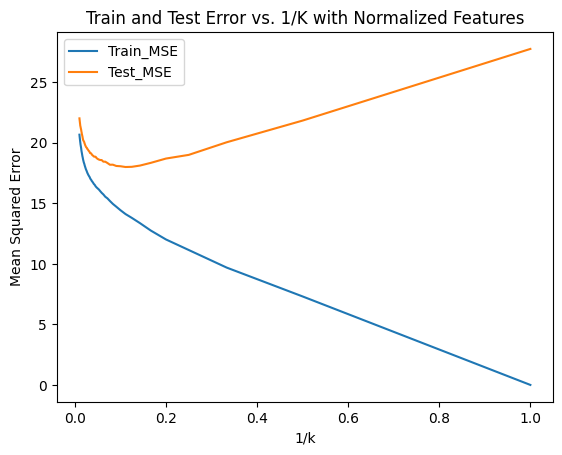

In [17]:
#[20]
normalized_train_input = sklearn.preprocessing.normalize(X=all_predictors_train_input)
normalized_test_input = sklearn.preprocessing.normalize(X=all_predictors_test_input)

normalized_MSE_data = []
normal_testing_MSE = []

#Normalized features
for normalized_k_value in k_values:
    #[18]
    normal_knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=int(normalized_k_value))
    normal_knn.fit(X=normalized_train_input, y=all_predictors_train_output)

    normal_train_predicted_y = normal_knn.predict(X=normalized_train_input)
    normal_test_predicted_y = normal_knn.predict(X=normalized_test_input)

    this_normal_train_MSE = stat.tools.eval_measures.mse(normal_train_predicted_y, all_predictors_train_output) #[17]
    this_normal_test_MSE = stat.tools.eval_measures.mse(normal_test_predicted_y, all_predictors_test_output) #[17]

    plotted_normal_k_value = 1.0 / normalized_k_value

    normalized_MSE_data.append([plotted_normal_k_value, this_normal_train_MSE, this_normal_test_MSE])

    normal_testing_MSE.append(this_normal_test_MSE)

normal_minimum_MSE = np.min(normal_testing_MSE)
normal_minimum_MSE_k = np.argmin(normal_testing_MSE)

print("(Normal) The minimum test MSE is:", normal_minimum_MSE)
print("(Normal) The k value that had the minimum test MSE (and best fit) is:", normal_minimum_MSE_k)

normal_knn_df = pd.DataFrame(np.array(normalized_MSE_data), columns=["1/k", "Train_MSE", "Test_MSE"])

#[19]
seaborn.lineplot(data=normal_knn_df, x="1/k", y="Train_MSE", label="Train_MSE")
seaborn.lineplot(data=normal_knn_df, x="1/k", y="Test_MSE", label="Test_MSE")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.plot()
plt.title("Train and Test Error vs. 1/K with Normalized Features")
plt.show()

### (j ) Compare KNN and Linear

The lowest testing MSE that I got in the linear models was 19.072 with the linear model that used interaction terms and quadradic nonlinearities that were statistically significant (removing terms that had a high p-value).

In the KNN models, the lowest testing MSE that I got using raw features was 17.115 with k = 4. The lowest testing MSE that I got using normalized features was 17.998 with k = 8.

Thus, in comparing these MSE values, the KNN models generally performed better than even the best linear regression model. I think the reason for this is because a linear regression model must fit a linear function to the datapoints. If the underlying/actual relationship is non-linear, then our linear regression model will always have some of error, as we're fitting a linear model to a non-linear relationship. I suspect that is what's happening here, and that the KNN model is much better equiped at fitting to a non-linear underlying relationship in the data.

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

In this case, I would say that the performance of the flexible method would be better than that of the inflexible method.

The flexible method tends to work best when the sample size n (number of datapoints) is extremely large, which is the case in this problem.

In addition, in the inflexible parametric method, there is one paramter for each of our predictors, creating a linear function. However, with few predictors p, the inflexible parametric method can only be used to estimate at most p paramters. This may not be enough parameters to accurately model the actual function f, never mind the fact that the actual function f could very well not be linear at all. Thus, the inflexible parametric method may lead to an inaccurate model. Finally, fitting a flexible model generally requires estimating more parameters than the inflexible model. But this would be easier in this case because the number of predictors is small to begin with. With fewer predictors, this could mean that the actual function f is simpler than if there were many predictors.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

In this case, I would say that the performance of the inflexible method would be better than that of the flexible method.

When we have a lot of predictors p, but only a small sample size n (number of datapoints), using a flexible method could risk overfitting. With few datapoints, the noise in the data could be overstated when we fit a model. This problem could be exacerbated with a flexible method, which would try to find a function that can try to too closely match the few datapoints we have. Generally speaking, the flexible method needs a lot of datapoints in order to be effective.

In addition, the flexible method needs to estimate a lot of parameters. This could be more difficult with a lot of predictors p, as this would mean that the actual function f could be very complicated (more so than if there were fewer predictors).

### (c) The relationship between the predictors and response is highly non-linear.

In this case, I would say that the performance of the flexible method would be better than that of the inflexible method.

The inflexible parametric method makes the assumption that the actual function f is linear, and the inflexible method only returns a linear function. If the actual relationship is highly non-linear, any model predicted by the inflexible method could be very inaccurate at modeling the actual relationship f. Menawhile, the flexible method doesn't make the assumption that f is linear, and can use different function types to find a better fit for the data. This would make a model via the flexible method much more likely to better predict a non-linear relationship.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

In this case, I would say that the performance of the inflexible method would be better than that of the flexible method.

When the variance of the error terms are high, this means that there could be a lot of noise in the data. With a lot of noise, we risk our model fitting too much to the noise in the data.

While the inflexible model is not immune to overfitting problems, it can only produce a linear model. Such a model cannot try to fit to every single possible instance of noise in our data. This means that overfitting to the noise is much less likely.

Meanwhile, as the flexible model doesn't have to produce a linear function, it could easily produce a non-linear model that could try to follow the noise too much, overfitting to the data. This could make the model much less likely to be able to accurately predict new test datapoints.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [18]:
obs1 = [0.0, 3.0, 0.0]
obs2 = [2.0, 0.0, 0.0]
obs3 = [0.0, 1.0, 3.0]
obs4 = [0.0, 1.0, 2.0]
obs5 = [-1.0, 0.0, 1.0]
obs6 = [1.0, 1.0, 1.0]

all_obs = [obs1, obs2, obs3, obs4, obs5, obs6]

for i in range(6):
    this_item = all_obs[i]

    x1 = this_item[0]
    x2 = this_item[1]
    x3 = this_item[2]

    eucl_dist_squared = (x1 ** 2.0) + (x2 ** 2.0) + (x3 ** 2.0)
    eucl_dist = eucl_dist_squared ** (0.5)

    print(i + 1, ":", eucl_dist)

1 : 3.0
2 : 2.0
3 : 3.1622776601683795
4 : 2.23606797749979
5 : 1.4142135623730951
6 : 1.7320508075688772


Euclidean Distances:

Obs 1 -- 3

Obs 2 -- 2

Obs 3 -- 3.162

Obs 4 -- 2.236

Obs 5 -- 1.414

Obs 6 -- 1.732

### (b) What is our prediction with K = 1? Why?

Prediction: "Green"

With K = 1, we look at the 1 closest neighbor (i.e. the closest neighbor) to our test point (0,0,0). In this case, the observation point with the lowest Euclidean distance away from our test point is observation 5, with a Euclidean distance of about 1.414. Observation 5 has the label of "Green". Thus, our prediction should be "Green".

### (c) What is our prediction with K = 3? Why?

Prediction: "Red"

With K = 3, we look at the 3 closest neighbors to our test point (0,0,0). The three closest points by Euclidean distance is obsveration 5 (dist = 1.414), observation 6 (dist = 1.732), and observation 2 (dist = 2). Observation 5 has the label of "Green". Observations 6 and 2 have the label of "Red". Thus we have two observations with a label of "Red" and one observation with a label of "Green". Thus, via majority polling, we should choose the label of "Red". Thus, our prediction should be "Red".

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

We would expect the best value for K to be small. When K is large, each test point polls from a much wider grouping of datapoints. However, if the decision boundary is highly non-linear, this means that such a wide grouping of datapoints could include a wide variety of different datapoints, datapoints that may not be acccurate in describing where the theoretical decision boundary is in relation to our test point. In other words, pulling from that many datapoints will generate a poor representation of the highly non-linear decision boundary. With a smaller K, we're only looking at a more localized grouping of datapoints. While this could lead to overfitting, because the decision boundary is already highly non-linear, the risk of overfitting is much less. Further, a smaller grouping of neighbors would allow KNN to be more responsive to a potentially rapidly changing decision boundary through the datapoints.

References:

[1] https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel

[2] https://seaborn.pydata.org/generated/seaborn.pairplot.html

[3] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.table.html

[4] https://towardsdatascience.com/simple-little-tables-with-matplotlib-9780ef5d0bc4

[5] https://www.geeksforgeeks.org/add-column-to-pandas-dataframe-with-a-default-value/

[6] https://www.statsmodels.org/stable/gettingstarted.html

[7] https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults

[8] https://seaborn.pydata.org/generated/seaborn.scatterplot.html

[9] https://matplotlib.org/stable/tutorials/introductory/pyplot.html

[10] https://www.statology.org/cooks-distance-python/

[11] https://seaborn.pydata.org/generated/seaborn.scatterplot.html

[12] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform

[13] https://sparkbyexamples.com/pandas/pandas-create-dataframe-from-multiple-series/

[14] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

[15] https://discovery.cs.illinois.edu/guides/DataFrame-Row-Selection/dataframe-isin-selection/

[16] https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.predict.html#statsmodels.regression.linear_model.RegressionResults.predict

[17] https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.mse.html

[18] https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.fit

[19] https://seaborn.pydata.org/generated/seaborn.lineplot.

[20] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html#sklearn.preprocessing.normalize